In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1

## Part 1: Fashion MNIST Clothing Classification

Fashion-MNIST is a dataset of Zalando's article images.
Each example is a 28x28 grayscale image, associated with a label from 10 classes.
The Fashion-MNIST dataset was proposed as a more challenging replacement dataset for the MNIST dataset.

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_train.csv'
data = pd.read_csv(url)
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462745,0.400000,0.40000,0.188235,0.0,0.0,0.003922,0.0,0.0,0.0
3,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003045,0.002876,0.00303,0.002968,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
data.shape

(5000, 785)

In [23]:
y = data.label.to_numpy() # labels 
X = data.iloc[:,1:785].to_numpy() # pixels

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels. 
Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
This pixel-value is an integer between 0 and 1.

The following figure shows a few images from the fashion-MNIST dataset

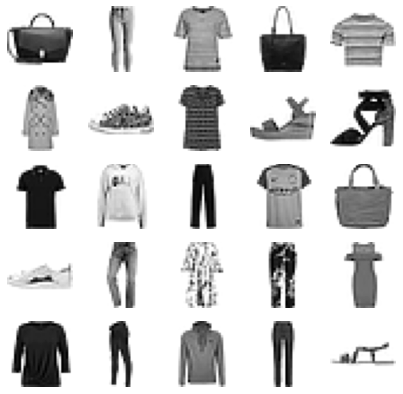

In [24]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(28,28),cmap='binary')
    plt.axis('off')    

**Labels:**

| Label | Description |
| :- | -: |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

**The goal** is to use the knn classifier to predict the labels of clothing images.

Split the dataset into training and validation sets.

Use the validation set to tune-in the parameters of the knn classifier (`k` and `weights`).

Test your classifier on the following test set. Compute the confusion matrix and the percentage of correct classification.

In [31]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_test.csv'
test_data = pd.read_csv(url)
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0.0,0.0,0.0,0.000015,0.0,0.0,0.000492,0.001569,0.000323,...,0.003306,0.003291,0.003353,0.003383,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,6,0.0,0.0,0.0,0.000015,0.0,0.0,0.000000,0.000000,0.000000,...,0.001353,0.001261,0.000877,0.000677,0.000723,0.000000,0.000000,0.000031,0.000031,0.0
2,8,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.517647,0.823529,0.698039,0.588235,0.000000,0.000000,0.0
4,9,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


## Part 2: The Labeled Faces in the Wild Dataset 

In [4]:
# Run this cell to load the Labeled Faces in the Wild people dataset
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data/255
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]

There are 1288 images, and each image has 1850 features. This is because each image is 50x37 pixels, and each feature simply represents one pixel's intensity.

(-0.5, 36.5, 49.5, -0.5)

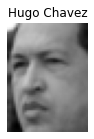

In [5]:
plt.figure(figsize=(2,2))
some_face = X[0]
some_face_image = some_face.reshape(50,37)
plt.imshow(some_face_image,cmap='gray')
plt.title(target_names[y[0]])
plt.axis('off')

The following figure shows a few more images from the *"labeled faces in the wild"* dataset

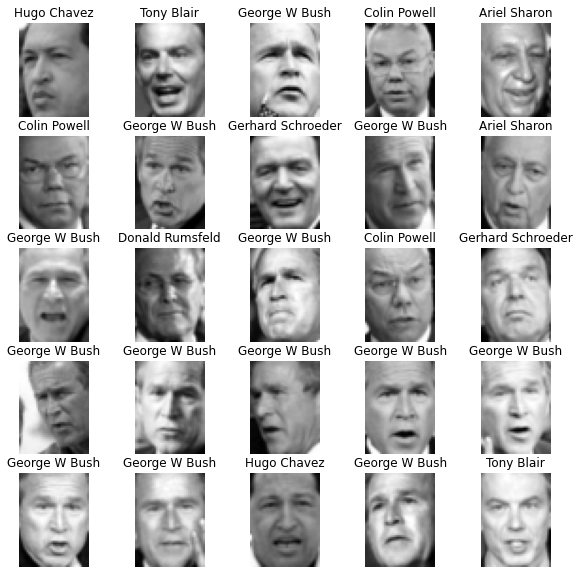

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    face = X[i]
    face_image = face.reshape(50,37)
    plt.subplot(5,5,i+1)
    plt.imshow(face_image,cmap = 'gray')
    plt.title(target_names[y[i]])
    plt.axis('off')  

**Labels:**

| Label | Description |
| :- | -: |
| 0 | Ariel Sharon |    
| 1 | Colin Powell |       
| 2 | Donald Rumsfeld |      
| 3 | George W Bush |       
| 4 | Gerhard Schroeder |      
| 5 | Hugo Chavez |      
| 6 | Tony Blair |  

**The goal** is to use the softmax classifier to predict the labels of the images.

Split the dataset into training and test sets

Use the training data to fit a softmax regression model

Test your classifier on the following test set. Compute the confusion matrix and the percentage of correct classification.

## Part 3: The Palmer Archipelago Penguin Data

<img src="cute_penguins.png" alt="Drawing" style="width: 500px;"/>

Art by @allison_horst

In [7]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/penguins_size.csv'
data = pd.read_csv(url)
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

This dataset contains data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica

In [10]:
data['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

The culmen is the upper ridge of a bird’s bill. For this penguin data, the culmen (bill) length and depth are measured as shown below.

<img src="culmen_depth.png" alt="Drawing" style="width: 500px;"/>

Some rows contain missing values (the `NaN` values). We will drop them from the pandas dataframe.

In [12]:
data.dropna(axis=0,inplace=True)

The **goal** is to use the knn classifier to predict the penguin species based on the penguin's mody beasurements 

In [17]:
# target vector (remark: numpy's bincount only works with integers, so we'll map species to (0,1,2))
y = data.species.map({'Adelie': 0, 'Chinstrap' : 1, 'Gentoo' : 2}).to_numpy() 

In [18]:
# feature matrix
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()

Shuffle the data

Split the data into training, validation and test sets

Use the validation set to tune-in the parameters of the knn classifier (`k` and `weights`).

Test your classifier on the test set. Compute the confusion matrix and the percentage of correct classification.

**Scaling the features:** The knn classifier is a distance based algorithm. 
Distance based algorithms are affected by the scale of the features. 
They give higher weightage to features which have higher magnitude (body_mass_g in our case).

We do not want our knn classifier to be affected by the magnitude of the features.
To overcome this problem, we can bring down all the variables to the same scale.

In [19]:
# Scale each feature (column) by its maximum absolute value.
X = X/np.abs(X).max(axis=0)

Use the validation set to tune-in the parameters of the knn classifier (k and weights).

Test your classifier on the following test set. Compute the confusion matrix and the percentage of correct classification.